# Installing required libraries


In [1]:
!pip install qrcode[pil]
!pip install image
!pip install datetime

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------- --------------------- 20.5/46.2 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 287.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     --------------------------------- ---- 51.2/58.1 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 759.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/41.2 kB ? eta -:--:--
     ----------------------------- ---------- 30.7/41.2 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 41.2/41.2 kB 491.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/341.8 kB ? eta -:--:--
     --------- ----------------------------- 81.9

In [2]:
import qrcode
from IPython.display import display, Image
from datetime import datetime, timedelta
from base64 import urlsafe_b64encode, urlsafe_b64decode
import math

# QR generator
** please change the 'expiration_minutes' as required


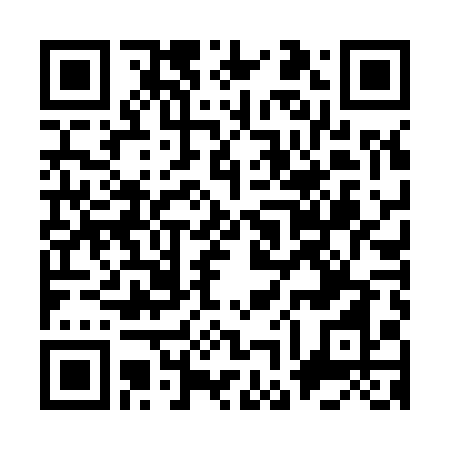

Dynamic QR code data: http://123.231.15.124:5000/validate_qr?dynamic_qr_data=MjAyMy0xMi0yMVQyMTozMDowMA==


In [3]:
def generate_dynamic_qr_code(data, expiration_minutes):

    current_datetime = datetime.now()
    expiration_time = timedelta(minutes=expiration_minutes)
    expiration_datetime = current_datetime + expiration_time
    rounded_minutes = expiration_datetime.minute + 1  # Rounding up minutes
    expiration_datetime = expiration_datetime.replace(minute=rounded_minutes, second=0, microsecond=0)

    # string representation
    encoded_datetime = expiration_datetime.isoformat()

    # Encoding the string to make it URL-safe
    encoded_data = urlsafe_b64encode(encoded_datetime.encode()).decode()

    data_with_expiration = f"{data}?dynamic_qr_data={encoded_data}"


    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(data_with_expiration)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")


    img.save("dynamic_qr.png")
    display(Image(filename='dynamic_qr.png'))
    img.show()

    return data_with_expiration


data_to_encode = "http://123.231.15.124:5000/validate_qr"
#Tnl, Only change this
expiration_minutes = 1440
dynamic_qr_data = generate_dynamic_qr_code(data_to_encode, expiration_minutes)
print(f"Dynamic QR code data: {dynamic_qr_data}")


** Encription / Decription mechanism (for you guys to understand)

* Change the 'expiration_time_in_minutes' as needed

In [4]:
def encode_datetime_with_expiration(expiration_minutes):
    current_datetime = datetime.now()
    expiration_time = timedelta(minutes=expiration_minutes)
    expiration_datetime = current_datetime + expiration_time
    rounded_minutes = expiration_datetime.minute + 1  # Rounding up minutes
    expiration_datetime = expiration_datetime.replace(minute=rounded_minutes, second=0, microsecond=0)
    encoded_datetime = expiration_datetime.isoformat()
    encoded_data = urlsafe_b64encode(encoded_datetime.encode()).decode()

    return encoded_data

def decode_datetime_with_expiration(encoded_data):

    decoded_datetime_bytes = urlsafe_b64decode(encoded_data.encode())
    decoded_datetime_str = decoded_datetime_bytes.decode()
    expiration_datetime = datetime.fromisoformat(decoded_datetime_str)

    return expiration_datetime

#Tnl Change here
expiration_time_in_minutes = 1440
encoded_data = encode_datetime_with_expiration(expiration_time_in_minutes)
now = datetime.now()
print(f"Encoded data: {now}")

print(f"Encoded data: {encoded_data}")

decoded_datetime = decode_datetime_with_expiration(encoded_data)
print(f"Decoded datetime: {decoded_datetime}")


Encoded data: 2023-12-21 13:10:21.355593
Encoded data: MjAyMy0xMi0yMVQxNDoxMTowMA==
Decoded datetime: 2023-12-21 14:11:00
